# Machine Learning process

### Imports

In [103]:
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob
import itertools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### Load data

In [435]:
##       TEST 1:
## Selecting a CSV for train and another CSV to test

# df_train = pd.read_csv('./filtered_data/smartphone_02-Feb-2022-20-22_cambio de línea agresivo izquierda_Data-Mv2MN6xv2W3Rv1Rmb_Z.csv')
# df_test = pd.read_csv('./filtered_data/smartphone_02-Feb-2022-20-19_cambio de línea agresivo izquierda_Data-Mv2L_EBJR_gDU3LpwVs.csv')

##       TEST 2:
## Joining all CSVs of a particular event

device = 'smartphone'
event = 'cambio de línea agresivo derecha'
files_to_read = glob.glob('./test_data/{}*{}*.csv'.format(device, event))

df = pd.DataFrame()
i = 0
for file in files_to_read[:]:
    i += 1
    df = pd.concat([df, pd.read_csv(file)])

print("files count: ", i)
df = df.set_index('id')
df_validation = pd.read_csv(files_to_read[:1][0]) # './filtered_data/smartphone_02-Feb-2022-20-33_conducción por ipiales_Data-Mv2OkQ_MG7IB4QX-XVx.csv')
##       TEST 2-1:
## Spliting the TEST 2 dataframe in train and test

# df_train, df_test = train_test_split(df, test_size=0.3, train_size=0.7, random_state=0, shuffle=False)
# print("Train data size: ", df_train.shape)
# print("Near crash event train data size: ", df_train["eventClass"][df_train["eventClass"] == 1].shape)
# print("No near crash event train data size: ", df_train["eventClass"][df_train["eventClass"] == 0].shape)

# print("\nTest data size: ", df_test.shape)
# print("Near crash event test data size: ", df_test["eventClass"][df_test["eventClass"] == 1].shape)
# print("No near crash event test data size: ", df_test["eventClass"][df_test["eventClass"] == 0].shape)

##      TEST 2-2:
## Don't split the TEST 2 dataframe!

print("All data size: ", df.shape)
print("Near crash event data size: ", df["eventClass"][df["eventClass"] == 1].shape)
print("No near crash event data size: ", df["eventClass"][df["eventClass"] == 0].shape)

# Show dataframe
df

files count:  5
All data size:  (3253, 17)
Near crash event data size:  (399,)
No near crash event data size:  (2854,)


,accX,accY,accZ,eventClass,idTrip,idVehicle,latitude,longitude,magX,magY,magZ,route,speed,timestamp,velAngX,velAngY,velAngZ
id,,,,,,,,,,,,,,,,,
39963,-0.045187,1.885076,9.557718,0,22,Nissan March (Xiaomi Redmi Note 9S),0.833448,-77.650099,0.772656,0.527059,0.696640,Cambio de línea agresivo derecha,1.935506,2022-02-02 20:28:49.810000-05:00,0.002870,-0.000104,0.000927
39964,-0.035472,1.935259,9.553223,0,22,Nissan March (Xiaomi Redmi Note 9S),0.833448,-77.650099,0.782333,0.514997,0.699963,Cambio de línea agresivo derecha,1.935506,2022-02-02 20:28:49.859000-05:00,0.002735,0.000062,0.001030
39965,-0.039930,2.033326,9.554011,0,22,Nissan March (Xiaomi Redmi Note 9S),0.833448,-77.650099,0.790560,0.516964,0.706742,Cambio de línea agresivo derecha,1.935506,2022-02-02 20:28:49.911000-05:00,0.004780,0.002353,0.000441
39966,-0.040852,2.072001,9.554512,0,22,Nissan March (Xiaomi Redmi Note 9S),0.833448,-77.650099,0.787120,0.527722,0.716012,Cambio de línea agresivo derecha,1.935506,2022-02-02 20:28:49.959000-05:00,0.005887,0.002288,0.000923
39967,-0.041517,2.126838,9.547589,0,22,Nissan March (Xiaomi Redmi Note 9S),0.833448,-77.650099,0.786766,0.544770,0.700228,Cambio de línea agresivo derecha,1.935506,2022-02-02 20:28:50.010000-05:00,0.005136,0.003051,0.001033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17587,0.103540,0.526799,9.721811,0,23,Nissan March (Xiaomi Redmi Note 9S),0.833299,-77.650136,0.421203,0.265333,0.619546,Cambio de línea agresivo derecha,15.221223,2022-01-23 19:22:34.096000-05:00,0.005623,-0.005282,0.001537
17588,-0.010365,0.930989,9.717285,0,23,Nissan March (Xiaomi Redmi Note 9S),0.833299,-77.650136,0.347743,0.355770,0.558520,Cambio de línea agresivo derecha,15.221223,2022-01-23 19:22:34.144000-05:00,0.004610,-0.010123,0.004360
17589,0.262208,0.994853,9.863323,0,23,Nissan March (Xiaomi Redmi Note 9S),0.833299,-77.650136,0.339093,0.443561,0.639536,Cambio de línea agresivo derecha,15.221223,2022-01-23 19:22:34.195000-05:00,0.016368,-0.007160,0.006469


### Select the interest variables

In [436]:
# Features = ["speed","accX","accY","magX","magY","magZ", "velAngX","velAngY","velAngZ","timestamp","eventClass"]
# Always put "eventClass" at the end:

#event_features = ["speed","accY"] # Agresive Acceleration and Agresive Brake (only smartphone)
#event_features = ["speed", "accPosition", "accY"] # Agresive Acceleration (only raspberry)
#event_features = ["speed", "accY"] # Agresive Brake (only raspberry)
#event_features = ["accX", "velAngZ", "magX", "magY"] # Agresive turn right and left  (only smartphone)
#event_features = ["speed", "accX", "accY", "velAngZ", "magX"] # Agresive turn right and left  (only raspberry)
event_features = ["accX", "velAngZ"] # Change line right and left (smartphone and raspberry)
event_features_label = [*event_features,  "eventClass"]
dataset = df[event_features_label].to_numpy()
dataset_validation = df_validation[event_features_label].to_numpy()
print("All data shape for the selected features: ",dataset.shape)

##    TEST 1 or 2-1
## Run the following code for the mentioned TEST
## Don't run in the TEST 2-2

# dataset_train = df_train[event_features_label].to_numpy()
# print("Shape of training data for the selected features: ", dataset_train.shape)

# dataset_test = df_test[event_features_label].to_numpy()
# print("Shape of testing data for the selected features: ", dataset_test.shape)

All data shape for the selected features:  (3253, 3)


### Make a sliding window

The sliding window have this shape:

$ rows = m - ws + 1 \\  columns = ws \\ pages = d$

![](https://es.mathworks.com/help/matlab/math/nddemo_02_es.gif)

Where:
- ***m***:  Is the dataset rows number
- ***ws***: Is the window size
- ***d***:  Is the number of feature of the data


#### Naive alternative
Sliding window without frames

In [389]:
def sliding_windows(dataset, window_size, event_features="X"):
      
      #     In 2-dimensional dataset:
      # Axis 0 -> Goes through the rows
      # Axis 1 -> Goes through the Cols
      sld_window = np.lib.stride_tricks.sliding_window_view(dataset, window_size, axis=0) #[::1, :] Add this for define window step
      print("\nSliding windows shape: ",sld_window.shape)

      # Spliting the dataset (features, label)
      separator = dataset.shape[1] - 1 # Split the last page corresponding to the eventClass
      features_data = sld_window[:, 0:separator, :]
      label_data = sld_window[:, separator, :]

      # Processing the sliding window
      # Get the mean, median, std, max and min value
      mean = features_data.mean(axis=2)
      median = np.median(features_data, axis=2)
      std = features_data.std(axis=2)
      max_val = features_data.max(axis=2)
      min_val = features_data.min(axis=2)
      # Get tendency
      divider = np.array([mean[0], *mean[:-1]])
      tendency = mean/np.where(divider == 0, 1, divider)
      label = st.mode(label_data, axis=1)[0]

      # Check processed sliding window
      #print("Processed sliding window shape: " +
      #      "mean={}, median={}, std={}, max_val={}, min_val={}, tendency={}, label={}"
      #      .format(mean.shape, median.shape, std.shape, max_val.shape, min_val.shape, tendency.shape, label.shape))

      # Concatenate processed sliding window
      
      # Test 1 with max and min values
      sld_window_features = np.concatenate((mean, median, std, max_val, min_val, tendency), axis=1)
      # Test 2 without max and min values
      #sld_window_features = np.concatenate((mean, median, std, tendency), axis=1)

      # Reshape label for sklearn standard
      label = label.reshape(label.shape[0])

      # Make the features names
      e_n = len(event_features) # Events number
      # Test 1
      measurements_names = [["mean"]*e_n, ["median"]*e_n, ["std"]*e_n, ["max_val"]*e_n, ["min_val"]*e_n, ["tendency"]*e_n]
      # Test 2
      #measurements_names = [["mean"]*e_n, ["median"]*e_n, ["std"]*e_n, ["tendency"]*e_n]
      measurements_names = list(itertools.chain(*measurements_names))
      events_names = event_features*(len(measurements_names)//e_n)
      sld_window_features_names = list(map('_'.join, zip(measurements_names, events_names)))

      return (sld_window_features, label, sld_window_features_names)


In [444]:
window_size = 40 #TODO: change to 20 with start

##    TEST 1, 2-1

# X_train, y_train = sliding_windows(variables_train, window_size)
# X_test, y_test = sliding_windows(variables_test, window_size)

##    TEST 2-2

X, y, features_names = sliding_windows(dataset, window_size, event_features)
X_validation, y_validation, features_names_v = sliding_windows(dataset_validation, window_size, event_features)


Sliding windows shape:  (3214, 3, 40)

Sliding windows shape:  (413, 3, 40)


#### Input features

In [445]:
##    TEST 1 or 2-1

# print("Train features shape:", X_train.shape)
# #print(X_train[0:5])
# print("Near crash event train data size: ", np.where(y_train == 1)[0].shape)
# print("No near crash event train data size: ", np.where(y_train == 0)[0].shape)

# print("\n")
# print("Test features shape:", X_test.shape)
# #print(X_test[0:5])
# print("Near crash event test data size: ", np.where(y_test == 1)[0].shape)
# print("No near crash event test data size: ", np.where(y_test == 0)[0].shape)

##    TEST 2-2

print("Features shape:", X.shape)
print("\nFeatures size for near crash event: ", np.where(y == 1)[0].shape)
print("Features size for no near crash event: ", np.where(y == 0)[0].shape)
print("\nSample of features: ")
pd.DataFrame(X[0:2], columns=features_names).head()


Features shape: (3214, 12)

Features size for near crash event:  (390,)
Features size for no near crash event:  (2824,)

Sample of features: 


,mean_accX,mean_velAngZ,median_accX,median_velAngZ,std_accX,std_velAngZ,max_val_accX,max_val_velAngZ,min_val_accX,min_val_velAngZ,tendency_accX,tendency_velAngZ
0,0.017677,0.003717,-0.034174,0.001266,0.160699,0.009898,0.453325,0.02422,-0.239043,-0.018478,1.000000,1.000000
1,0.021302,0.003121,-0.029776,0.001266,0.160876,0.010728,0.453325,0.02422,-0.239043,-0.022877,1.205086,0.839879


## Machine Learning 

Make a Machine Learning algorithms with this librarys and this split of data

In [354]:
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=300, shuffle=True)

print("Train data shape:", X_train.shape)
print("Train label shape:", y_train.shape)
print("Near crash event train data size: ", np.where(y_train == 1)[0].shape)
print("No near crash event train data size: ", np.where(y_train == 0)[0].shape)

print("\nTest data shape:", X_test.shape)
print("Test label shape:", y_test.shape)
print("Near crash event test data size: ", np.where(y_test == 1)[0].shape)
print("No near crash event test data size: ", np.where(y_test == 0)[0].shape)

Train data shape: (2711, 12)
Train label shape: (2711,)
Near crash event train data size:  (239,)
No near crash event train data size:  (2472,)

Test data shape: (1163, 12)
Test label shape: (1163,)
Near crash event test data size:  (121,)
No near crash event test data size:  (1042,)


### Support Vector Machines

In [111]:
clf_svm = svm.SVC(C=10, gamma=1, kernel='rbf', probability=True)
clf_svm.fit(X_train, y_train)

SVC(C=10, gamma=1, probability=True)

### Decision Trees

7 15


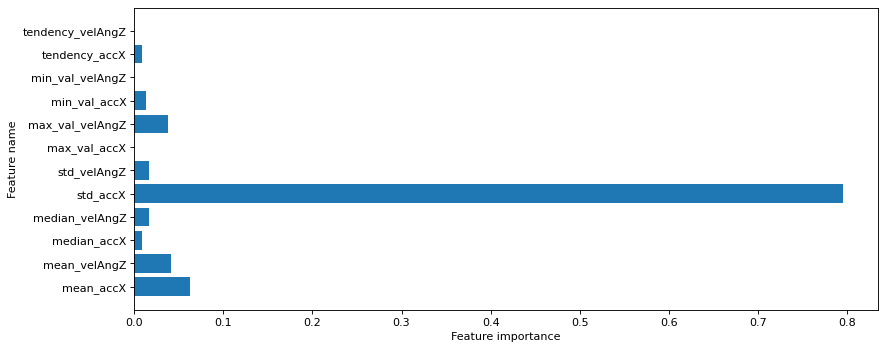

In [340]:
clf_dt = tree.DecisionTreeClassifier(criterion = "gini")
clf_dt.fit(X_train, y_train)

print(clf_dt.get_depth(), clf_dt.get_n_leaves())

# Check more significants variables
def plot_feature_importances(clf, features_names):
    c_features = len(features_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), features_names)

plt.figure(figsize=(12,5), dpi=80)
plot_feature_importances(clf_dt, features_names)
plt.show()

#### Decision tree representation

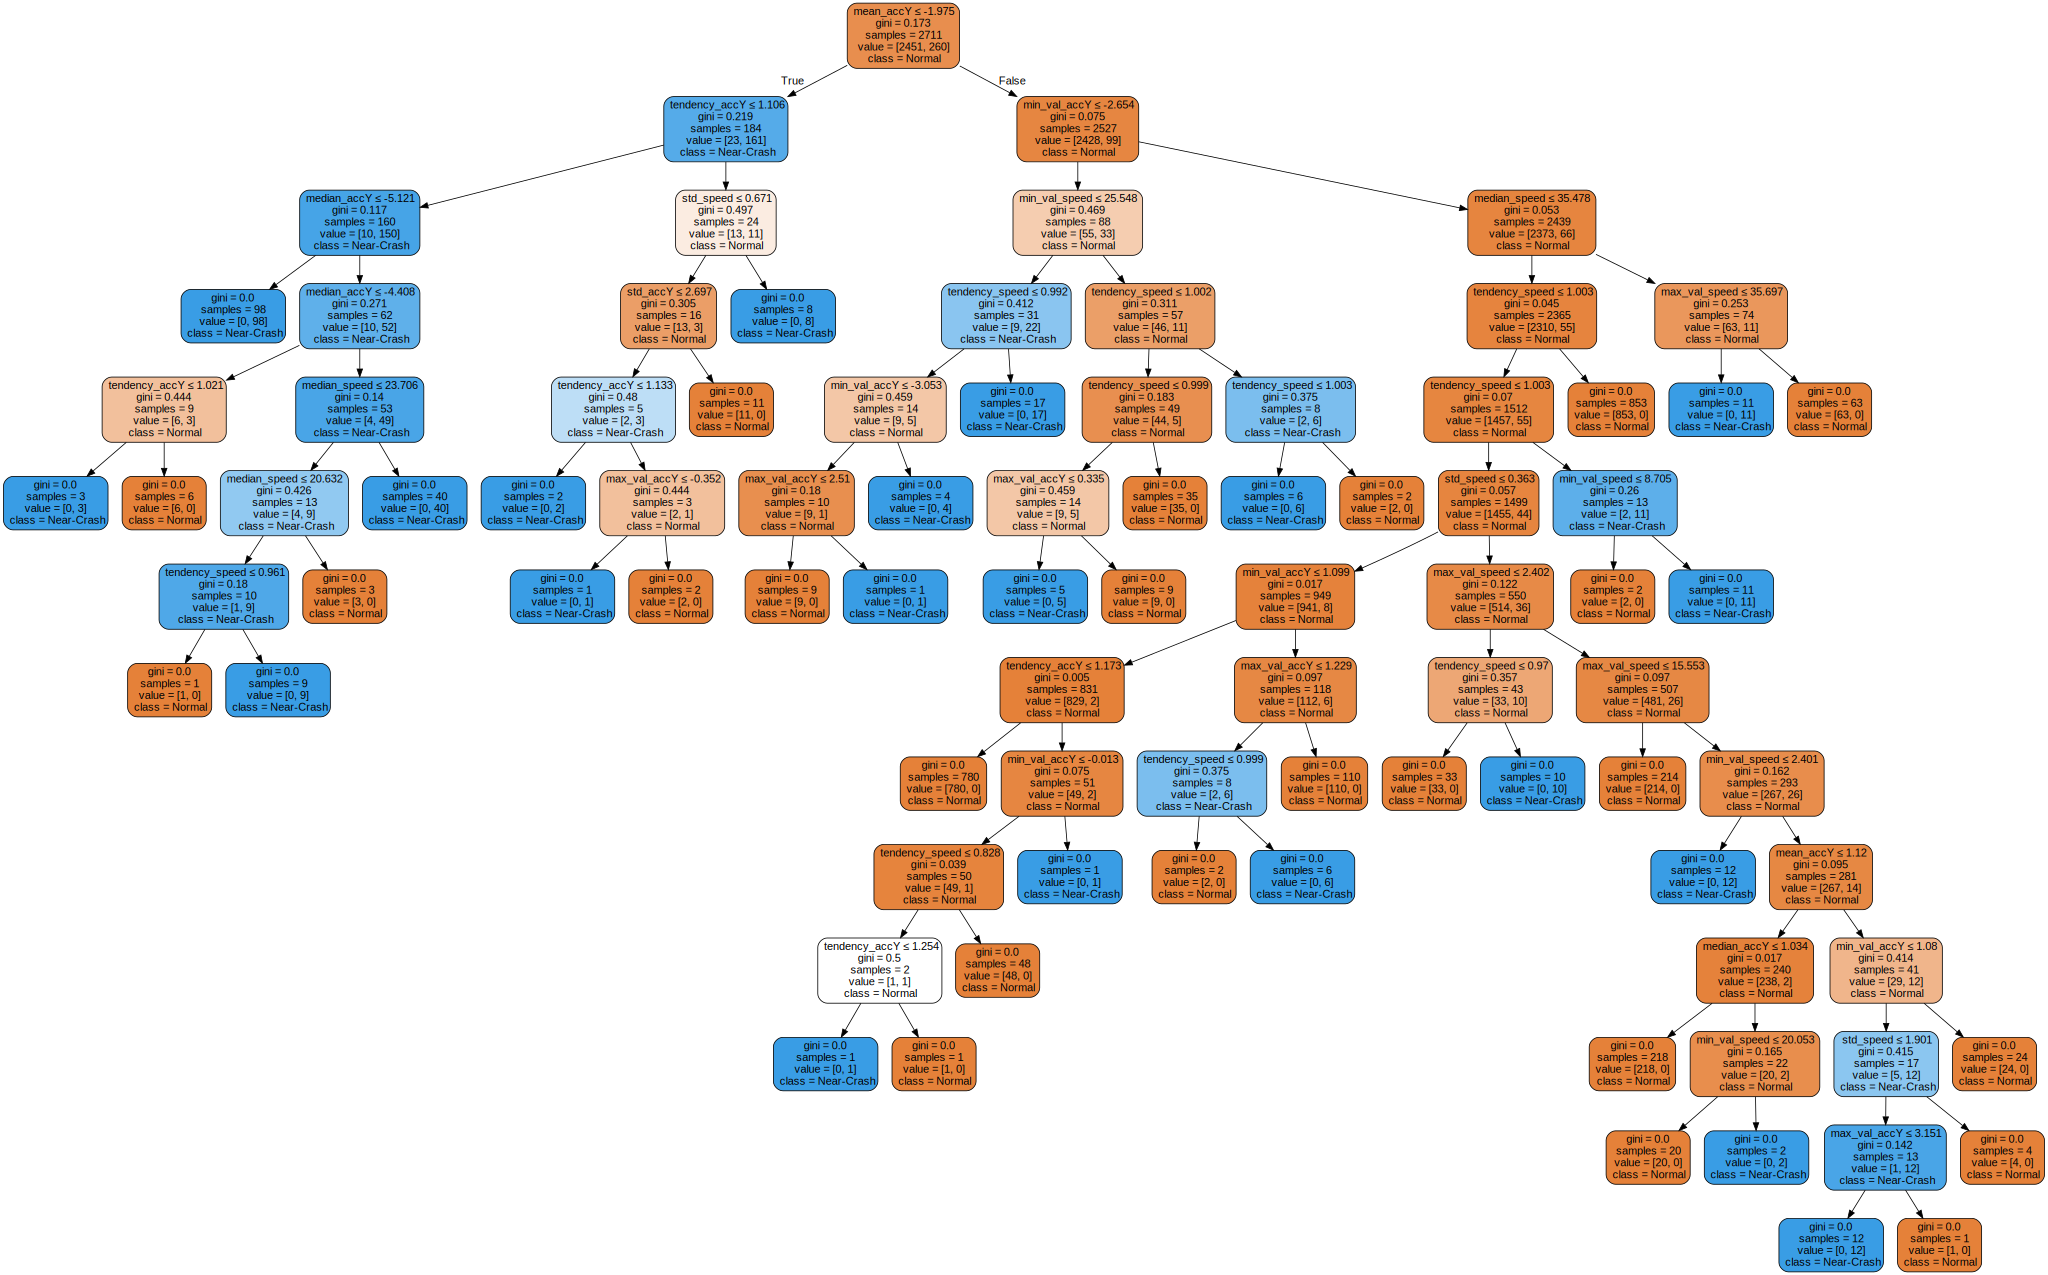

In [95]:
import graphviz
dot_data = tree.export_graphviz(clf_dt, out_file=None, 
                                feature_names=features_names,
                                class_names=["Normal", "Near-Crash"],
                                filled=True, rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data)
graph

### Random forest

In [112]:
clf_rf = RandomForestClassifier(n_estimators=200)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

### Test ML algorithm

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from collections import Counter
"""
Accuracy = TP + TN / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
F1 = 2 * Precision * Recall / (Precision + Recall)
"""

for clf in (clf_svm, clf_dt, clf_rf):
    y_predict = clf.predict(X_test)
    y_predict_proba = clf.predict_proba(X_test)[:,1]
    print("\nClassifier Name: ",clf.__class__.__name__)

    print('Accuracy: {:.6f}'.format(accuracy_score(y_test, y_predict)))
    print('Precision: {:.6f}'.format(precision_score(y_test, y_predict)))
    print('Recall: {:.6f}'.format(recall_score(y_test, y_predict)))
    print('F1: {:.6f}'.format(f1_score(y_test, y_predict)))
    print('AUC: {:.6f}'.format(roc_auc_score(y_test, y_predict_proba)))
    print("Count total data predicted: Near Crash = {}, Normal = {}".format(Counter(y_predict)[1], Counter(y_predict)[0]))


#y_predict = clf_svm.predict(X)
#print(Counter(y), Counter(y_predict))


Classifier Name:  SVC
Accuracy: 0.976631
Precision: 0.934783
Recall: 0.826923
F1: 0.877551
AUC: 0.994166
Count total data predicted: Near Crash = 92, Normal = 935

Classifier Name:  DecisionTreeClassifier
Accuracy: 0.992210
Precision: 0.980000
Recall: 0.942308
F1: 0.960784
AUC: 0.968872
Count total data predicted: Near Crash = 100, Normal = 927

Classifier Name:  RandomForestClassifier
Accuracy: 0.991237
Precision: 0.952381
Recall: 0.961538
F1: 0.956938
AUC: 0.999589
Count total data predicted: Near Crash = 105, Normal = 922


#### Confusion matrix


Classifier Name:  SVC


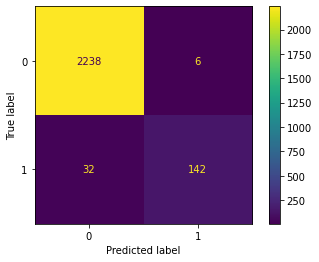


Classifier Name:  DecisionTreeClassifier


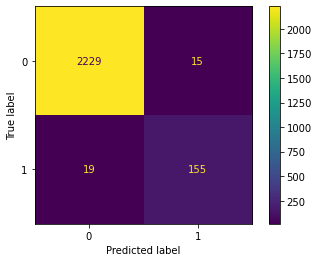


Classifier Name:  RandomForestClassifier


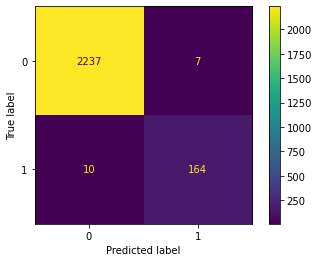

In [113]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

for clf in (clf_svm, clf_dt, clf_rf):
    print("\nClassifier Name: ",clf.__class__.__name__)
    y_predict = clf.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_predict)
    #print(y_validation, y_predict)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot()
    plt.show()

#### Roc curves and Area Under Curve (AUC)

In [15]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(clf, X_test, y_test):
    clf_name = "".join(c for c in clf.__class__.__name__ if c.isupper())
    y_score = clf.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    #print("Tasa de falsos positivos: {}, Tasa de verdaderos positivos: {}".format(fpr, tpr))
    roc_auc = auc(fpr, tpr)
    accuracy = clf.score(X_test, y_test)
    plt.plot(fpr, tpr, lw=3, alpha=0.7, 
             label='Algorithm {} (acc={:0.6f}, area={:0.6f})'.format(clf_name, accuracy, roc_auc))

Tasa de falsos positivos: [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.47867299e-04
 9.47867299e-04 1.89573460e-03 1.89573460e-03 2.84360190e-03
 2.84360190e-03 3.79146919e-03 3.79146919e-03 5.68720379e-03
 5.68720379e-03 8.53080569e-03 2.18009479e-02 2.18009479e-02
 3.50710900e-02 3.50710900e-02 7.62085308e-01 7.62085308e-01
 9.96208531e-01 1.00000000e+00], Tasa de verdaderos positivos: [0.         0.00925926 0.11111111 0.11111111 0.69444444 0.69444444
 0.73148148 0.73148148 0.7962963  0.7962963  0.9537037  0.9537037
 0.97222222 0.97222222 0.97222222 0.98148148 0.98148148 0.99074074
 0.99074074 1.         1.         1.        ]
Tasa de falsos positivos: [0.         0.00853081 1.        ], Tasa de verdaderos positivos: [0.         0.93518519 1.        ]
Tasa de falsos positivos: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

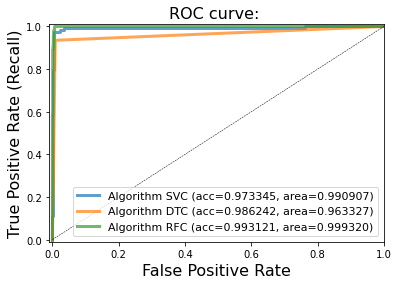

In [16]:
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])

for clf in (clf_svm, clf_dt, clf_rf):
    plot_roc_curve(clf, X_test, y_test)

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: ', fontsize=16)
plt.show()

### Optimize algorithms

In [15]:
print("Parameters SVM: ", clf_svm.get_params())
print("\nParameters DT: ", clf_dt.get_params())
print("\nParameters RF: ", clf_rf.get_params())
#{'max_depth': [11,10,9,8,7,6,5], 'max_leaf_nodes': [20,19,18,17,16,15], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf':[1,2,3,4,5], 'class_weight': [None, 'balanced']}

Parameters SVM:  {'C': 30, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.5, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 10, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Parameters DT:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}

Parameters RF:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, '

In [446]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit
from scipy.stats import expon as sp_expon
from scipy.stats import randint as sp_randint

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=160, shuffle=True)
#clf = svm.SVC(kernel='rbf')
#clf = tree.DecisionTreeClassifier(criterion = "gini")
clf = RandomForestClassifier(n_jobs=2)
split = KFold(n_splits=5, shuffle=True, random_state=320)

#grid_values = {'C': [0.01, 0.05, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 10]} # SVM case
#grid_values = {'max_depth':[2,3,4,5,6,7,8,9,10], 'max_leaf_nodes': [5,6,10,15,20,25,30,40,50,60], 'class_weight': [None, 'balanced']} # DT case
grid_values = {'max_samples':[0.9, 0.95, None], 'n_estimators': [100, 200, 300], 'class_weight': [None, 'balanced']} # RF case

# RandomizedSearchCV alternative
#n_estimators = sp_expon(scale=100)
#max_depth = sp_randint(1, 40)
#param_dist = {
#    "gamma": sp_expon(scale = 10),
#    "C": sp_expon(scale = 10)
#}
scores = ['f1', 'precision', 'recall', 'roc_auc']
for score in scores:
    grid_clf = GridSearchCV(clf, param_grid = grid_values, cv=split,  scoring = score)
    grid_clf.fit(X, y)
    print('\n\nBest parameter (max. {}): {}'.format(score, grid_clf.best_params_))
    print('Best score ({}): {}'.format(score, grid_clf.best_score_))



Best parameter (max. f1): {'class_weight': 'balanced', 'max_samples': 0.95, 'n_estimators': 300}
Best score (f1): 0.9696095485722935


Best parameter (max. precision): {'class_weight': 'balanced', 'max_samples': 0.9, 'n_estimators': 200}
Best score (precision): 0.9719824772742625


Best parameter (max. recall): {'class_weight': 'balanced', 'max_samples': None, 'n_estimators': 300}
Best score (recall): 0.9699974427581644


Best parameter (max. roc_auc): {'class_weight': None, 'max_samples': None, 'n_estimators': 300}
Best score (roc_auc): 0.9993450816762778


In [450]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit

#clf = svm.SVC(C= 100, gamma= 0.01, kernel='rbf', probability=True) "balanced"
#clf = tree.DecisionTreeClassifier(criterion = "gini", class_weight=None, max_depth=4, max_leaf_nodes=30)
clf = RandomForestClassifier(n_jobs=2, class_weight=None, max_samples=None, n_estimators=300)

cv = KFold(n_splits=5, shuffle=True, random_state=320)
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=150)
#cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=5)  # Make a shuffle split beacuase the data is unbalanced
#cv = StratifiedShuffleSplit(n_splits=5)

#for clf in (clf_svm,clf_dt,clf_rf):
print("\nEstimator: ",clf.__class__.__name__)
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=cv).mean())
print('Cross-validation (F1)', cross_val_score(clf, X, y, cv=cv, scoring = 'f1').mean())
print('Cross-validation (precision)', cross_val_score(clf, X, y, cv=cv, scoring = 'precision').mean())
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=cv, scoring = 'recall').mean())
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=cv, scoring = 'roc_auc').mean())


Estimator:  RandomForestClassifier
Cross-validation (accuracy) 0.9906643798781994
Cross-validation (F1) 0.9621445865878954
Cross-validation (precision) 0.9593079388944474
Cross-validation (recall) 0.9627252829579147
Cross-validation (AUC) 0.9992648317237485


In [33]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

y_proba_list = list(zip(y_test[40:100], y_predict[40:100], y_prob[40:100,1] ))
y_proba_list

[(0.0, 0.0, 0.026717715832258224),
 (0.0, 0.0, 0.002811170329213989),
 (0.0, 0.0, 3.5891322203243184e-06),
 (0.0, 0.0, 0.03718512034307072),
 (1.0, 1.0, 0.9932646248554848),
 (0.0, 0.0, 5.880812186837592e-06),
 (0.0, 0.0, 0.0003091054731649595),
 (0.0, 0.0, 1.738266248894623e-07),
 (0.0, 0.0, 0.0028459964447262415),
 (0.0, 0.0, 0.026576680426346314),
 (0.0, 0.0, 8.793170046213386e-05),
 (0.0, 0.0, 0.00021705241929323568),
 (0.0, 0.0, 1.2554277143485653e-05),
 (0.0, 0.0, 0.018475541229286806),
 (0.0, 0.0, 0.011719568486356653),
 (0.0, 0.0, 3.885348770152377e-06),
 (1.0, 1.0, 0.9107705756236444),
 (0.0, 0.0, 0.0002973665039336311),
 (0.0, 0.0, 0.00018371356175025114),
 (0.0, 0.0, 0.001004576819888119),
 (0.0, 0.0, 6.687172909149326e-05),
 (0.0, 0.0, 0.025663145262257932),
 (0.0, 0.0, 0.0007070648946760622),
 (0.0, 0.0, 0.00014912120128252043),
 (0.0, 0.0, 0.0001188681273956779),
 (0.0, 0.0, 0.01104358063083808),
 (1.0, 1.0, 0.9860210426005136),
 (0.0, 0.0, 0.0014146937335905053),
 (0.0, 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict, target_names=['Normal', 'Near Crash']))

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99      1067
  Near Crash       0.95      0.88      0.91        96

    accuracy                           0.99      1163
   macro avg       0.97      0.94      0.95      1163
weighted avg       0.99      0.99      0.99      1163



[1.00000000e-03 7.74263683e-03 5.99484250e-02 4.64158883e-01
 3.59381366e+00 2.78255940e+01 2.15443469e+02 1.66810054e+03
 1.29154967e+04 1.00000000e+05]


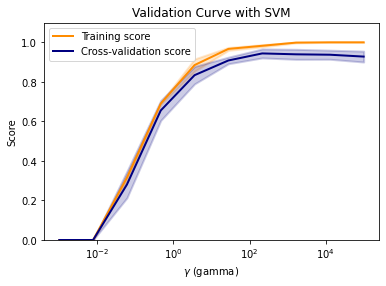

In [21]:
from sklearn.model_selection import validation_curve

#clf_svm = svm.SVC(kernel='rbf', random_state=0)
clf_svm = svm.SVC(gamma=0.02, kernel='rbf', probability=True)
#clf_dt = tree.DecisionTreeClassifier(criterion = "gini", max_depth=None, max_leaf_nodes=None)
param_range = np.logspace(-3, 5, 10)
print(param_range)
train_scores, test_scores = validation_curve(clf_svm, X, y,
                                            param_name='C',
                                            param_range=param_range, cv=cv, scoring = 'recall')
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

#grid_values = [{'gamma': [0.01, 0.05, 0.1, 0.5, 1], 'C': [0.01, 0.05, 0.1, 0.5, 1]},
#               {'gamma': [0.005, 0.01, 0.05, 0.1, 0.5], 'C': [100, 500, 1000, 1500]}, 
#               {'gamma': [0.1, 0.5, 1, 5, 10], 'C': [0.1, 0.5, 1, 5, 10]}]

#

# Sliding window with frames

In [ ]:
# Tendency
'''
def trend(arr):
    """This function calculates the trend with the unique loopback option for this type of calculation

    This tendency is not make for frame form, for this reason the equation is this: register(i)/last_register
    where "i" is the position of a register

    Note: I calculate the first tendency how last_register/last_register = 1, 
    this data appear in all first values of all rows in the slide window
    """
    t = [arr[-i]/arr[-1] for i in range(1, len(arr)+1)]
    #mean[::-1]/mean[-1]
    #for i in range(1,len(array)+1):
    #    t.append(array[-i]/array[-1])
    return np.array(t)

variables_trend = np.apply_along_axis(trend, axis=2, arr=measured_variables)
variables_trend = variables_trend.reshape(variables_trend.shape[0], variables_trend.shape[1]*ws)   # Son 20 para la speed y 20 para la accY
print("\nSample of sliding window process for tendency")
print("Tendency slide window shape: ", variables_trend.shape)
print("Tendency:\n {}".format(variables_trend[0:2,:]))
'''

'\ndef trend(arr):\n    """This function calculates the trend with the unique loopback option for this type of calculation\n\n    This tendency is not make for frame form, for this reason the equation is this: register(i)/last_register\n    where "i" is the position of a register\n\n    Note: I calculate the first tendency how last_register/last_register = 1, \n    this data appear in all first values of all rows in the slide window\n    """\n    t = [arr[-i]/arr[-1] for i in range(1, len(arr)+1)]\n    #mean[::-1]/mean[-1]\n    #for i in range(1,len(array)+1):\n    #    t.append(array[-i]/array[-1])\n    return np.array(t)\n\nvariables_trend = np.apply_along_axis(trend, axis=2, arr=measured_variables)\nvariables_trend = variables_trend.reshape(variables_trend.shape[0], variables_trend.shape[1]*ws)   # Son 20 para la speed y 20 para la accY\nprint("\nSample of sliding window process for tendency")\nprint("Tendency slide window shape: ", variables_trend.shape)\nprint("Tendency:\n {}".for

In [ ]:
# tendency
'''
def means_loopback(array):
    """This functions calculate the means with loop back option
    """
    means = []
    for i in range(1,len(array)+1):
        means.append(array[-i:].mean())
    return np.array(means)

print("data to get loop back mean: \n", measured_variables[0:2,:,:])
# mean loopback test
mean_lb = np.apply_along_axis(means_loopback, 2, measured_variables[0:2,:,:])
print("Mean loopback: \n",mean_lb)
'''

'\ndef means_loopback(array):\n    """This functions calculate the means with loop back option\n    """\n    means = []\n    for i in range(1,len(array)+1):\n        means.append(array[-i:].mean())\n    return np.array(means)\n\nprint("data to get loop back mean: \n", measured_variables[0:2,:,:])\n# mean loopback test\nmean_lb = np.apply_along_axis(means_loopback, 2, measured_variables[0:2,:,:])\nprint("Mean loopback: \n",mean_lb)\n'